<a href="https://colab.research.google.com/github/Aman811630/Mall-Customer-Churn-Clustering-Project-by-Aman-Singh/blob/main/Mall_Customer_Churn_Prtoject_by_Amna_Singh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mall Customer Churn Project by Aman Singh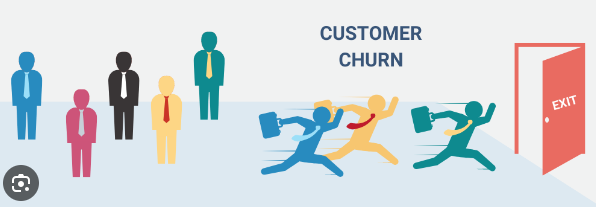

# Problem Question ?

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.shape , df.size


((200, 5), 1000)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
df.isnull().sum() # NO null Values Present

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df1=df.drop(["CustomerID"],axis=1)
df1.sample(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
72,Female,60,50,49
197,Male,32,126,74
162,Male,19,81,5
134,Male,20,73,5
28,Female,40,29,31


In [10]:
df1.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

<ipython-input-11-ce1358e260d7>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],bins = 20)
<ipython-input-11-ce1358e260d7>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],bins = 20)
<ipython-input-11-ce1358e260d7>:8: UserWarning: 

`distplot` is a deprecated function and will be re

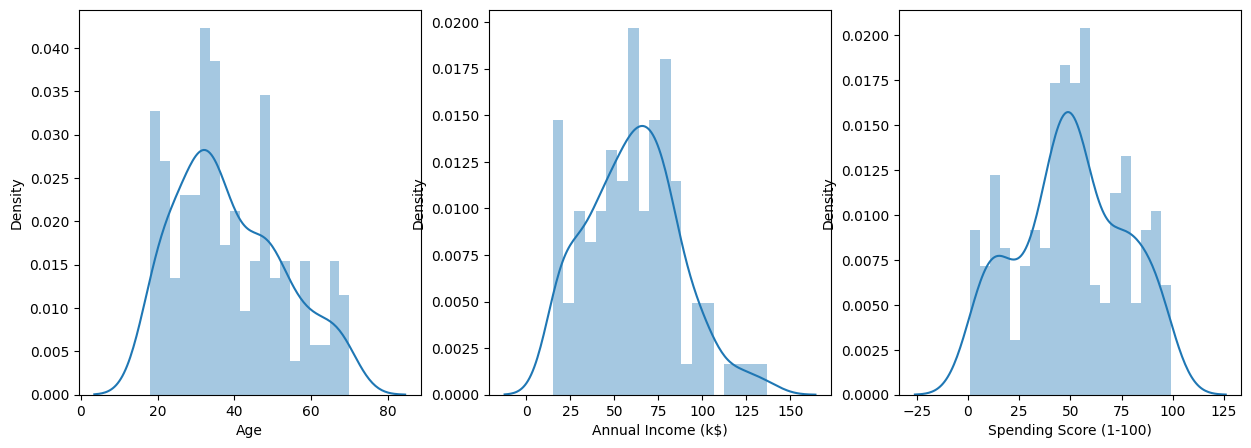

In [11]:
plt.figure(1, figsize=(15,5))

n= 0

for i in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n +=1
  plt.subplot(1,3,n)
  sns.distplot(df[i],bins = 20)
plt.show()

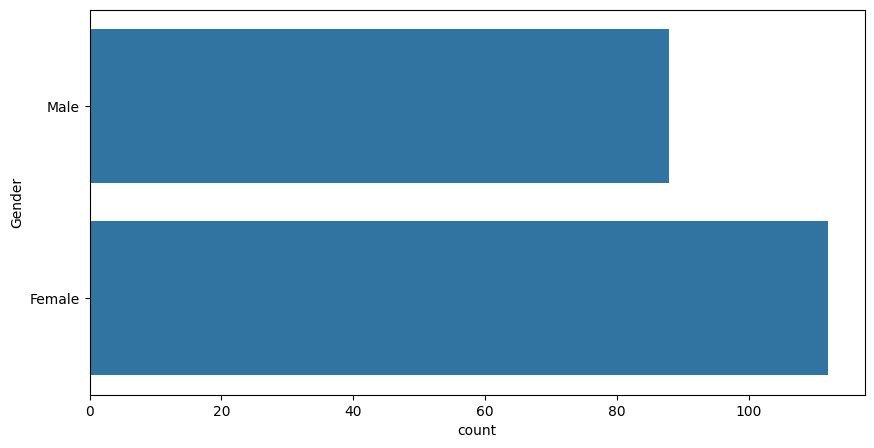

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(y="Gender", data = df1)
plt.show()

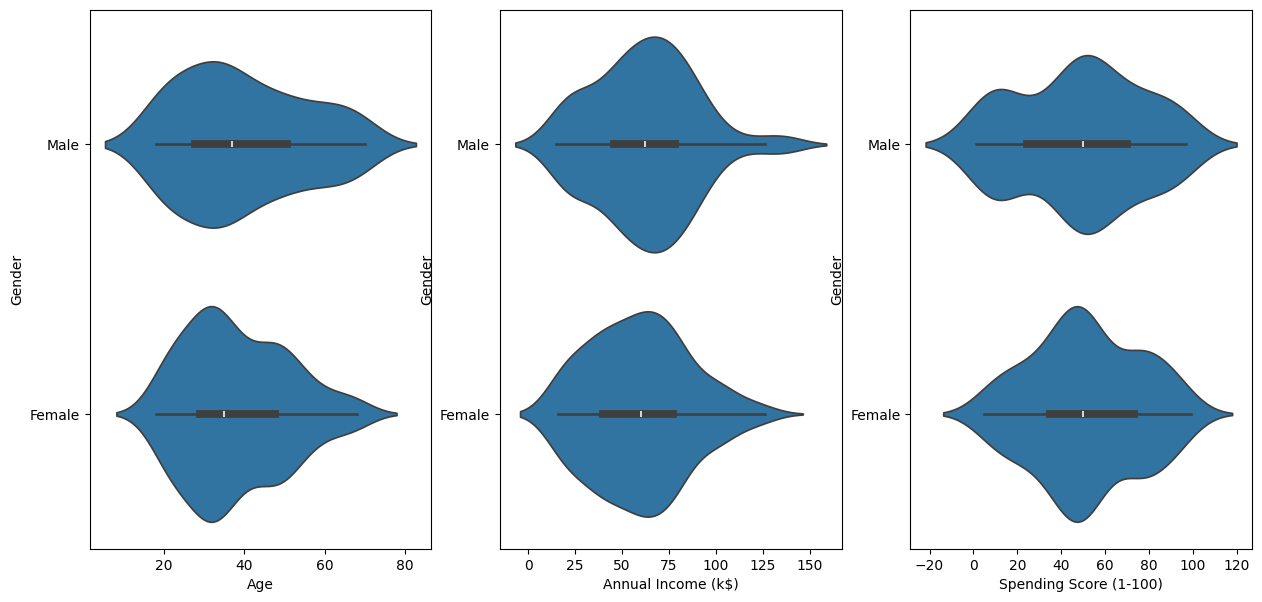

In [13]:
plt.figure(i,figsize=(15,7))

n=0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n +=1
  plt.subplot(1,3,n)
  sns.violinplot(x= cols,y= 'Gender', data = df1)
plt.show()

<ipython-input-14-4a821c0ce180>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = agex, y = agey, palette="mako")


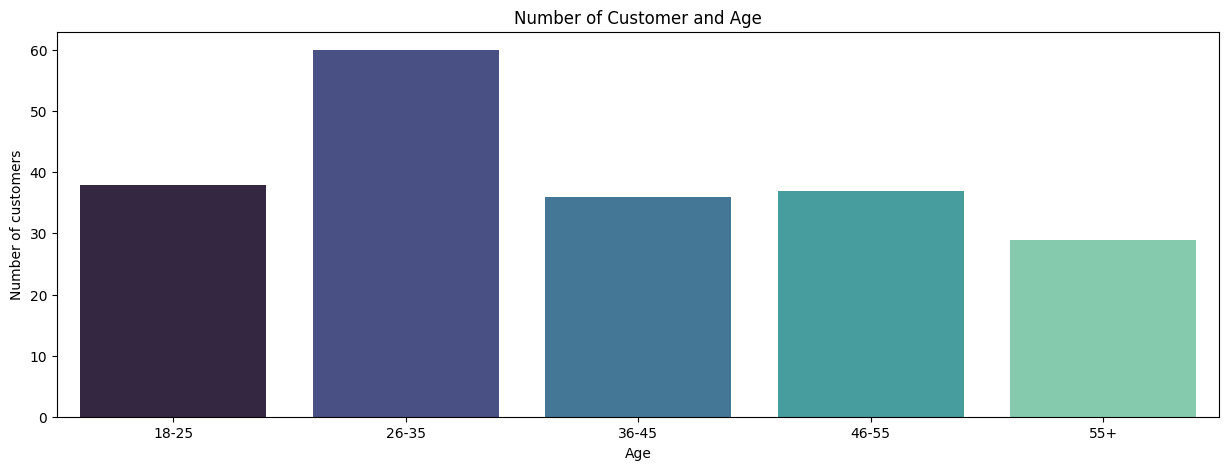

In [14]:
# For Better understanding lets divide the age further in range

age_18_25= df1.Age[(df1.Age >= 18) & (df1.Age <= 25)]
age_26_35= df1.Age[(df1.Age >= 26)& (df1.Age <= 35)]
age_36_45= df1.Age[(df1.Age >= 36) & (df1.Age <= 45)]
age_46_55= df1.Age[(df1.Age >= 46) & (df1.Age <= 55)]
age_above_55 = df1.Age[(df1.Age >= 56)]


agex = ['18-25','26-35','36-45','46-55','55+']
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_above_55.values)]

plt.figure(figsize=(15,5))
sns.barplot(x = agex, y = agey, palette="mako")
plt.title("Number of Customer and Age")
plt.xlabel("Age")
plt.ylabel("Number of customers")
plt.show()


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

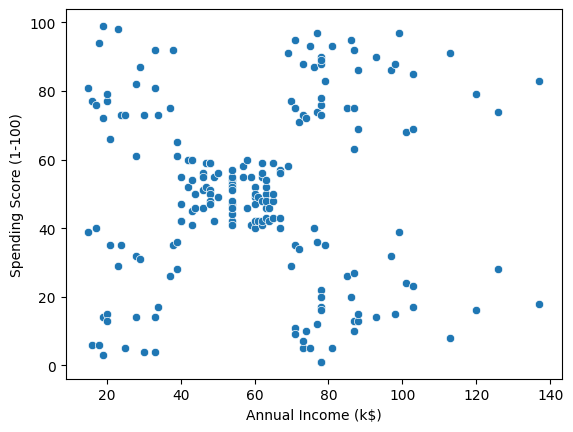

In [15]:
# Visulaizing rlation ship between 'Annual Income (k$)' and  'Spending Score (1-100)'

sns.scatterplot(x='Annual Income (k$)',y= 'Spending Score (1-100)',data = df1)

<ipython-input-16-192b53c17fdb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ssx, y = ssy, palette="rocket")


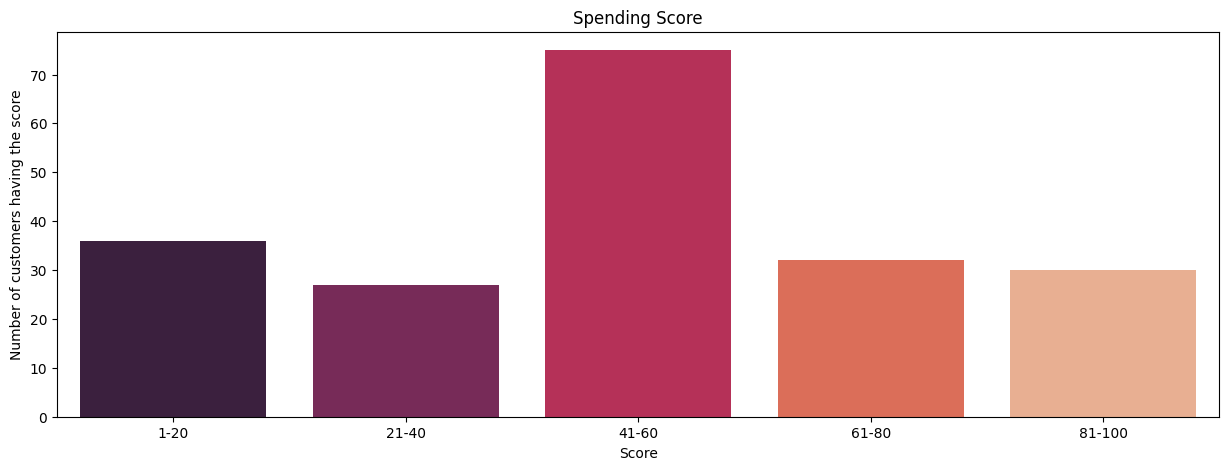

In [16]:
# For Better understanding lets divide the Spending Score (1-100)  further in range


ss_1_20 = df1["Spending Score (1-100)"][( df1["Spending Score (1-100)"] >= 1) &  (df1["Spending Score (1-100)"] <= 20)]
ss_21_40 = df1["Spending Score (1-100)"][( df1["Spending Score (1-100)"] >= 21) &  (df1["Spending Score (1-100)"] <= 40)]
ss_41_60 = df1["Spending Score (1-100)"][( df1["Spending Score (1-100)"] >= 41) &  (df1["Spending Score (1-100)"] <= 60)]
ss_61_80 = df1["Spending Score (1-100)"][( df1["Spending Score (1-100)"] >= 61) &  (df1["Spending Score (1-100)"] <= 80)]
ss_81_100 = df1["Spending Score (1-100)"][( df1["Spending Score (1-100)"] >= 81)]

ssx=["1-20",'21-40','41-60','61-80','81-100']
ssy = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(15,5))
sns.barplot(x = ssx, y = ssy, palette="rocket")
plt.title("Spending Score")
plt.xlabel("Score")
plt.ylabel("Number of customers having the score")
plt.show()



<ipython-input-17-6203225f81d5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = inx, y = iny, palette="Spectral")


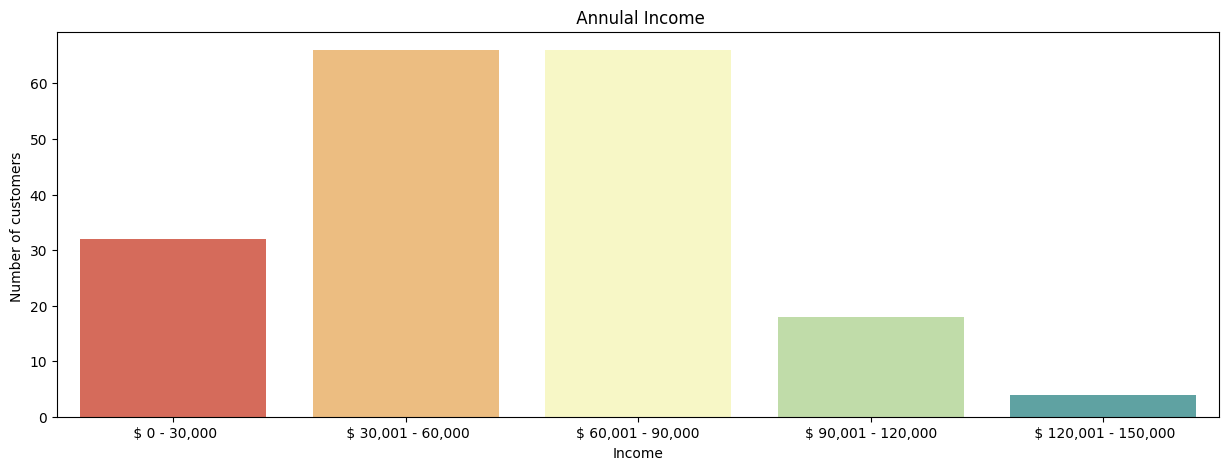

In [17]:
# For Better understanding lets divide the  Annual Income (k$) further in range

income_0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
income_31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
income_61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
income_91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
income_121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

inx = [" $ 0 - 30,000" , " $ 30,001 - 60,000" , "$ 60,001 - 90,000" , "$ 90,001 - 120,000" , " $ 120,001 - 150,000"]
iny = [len(income_0_30.values),len(income_31_60.values),len(income_31_60.values),len(income_91_120.values),len(income_121_150.values)]

plt.figure(figsize=(15,5))
sns.barplot(x = inx, y = iny, palette="Spectral")
plt.title(" Annulal Income")
plt.xlabel("Income")
plt.ylabel("Number of customers ")
plt.show()


# Time for Clustring

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

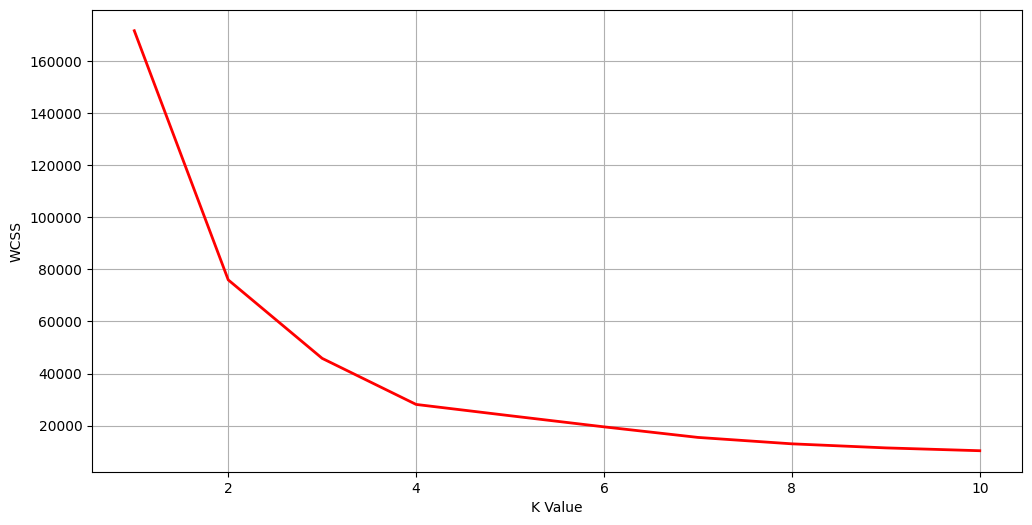

In [31]:
x1 =df1.loc[:,["Age","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss=[]
for k in range (1,11):
  kmeans = KMeans(n_clusters=k,init ="k-means++")
  kmeans.fit(x1)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2, color= "red")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [34]:
# no of cluster = 4
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(x1)

print(label)

[3 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 3 3 1 2 3 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1
 2 1 2 0 2 0 3 1 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 2 3 2 0 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 3
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]]


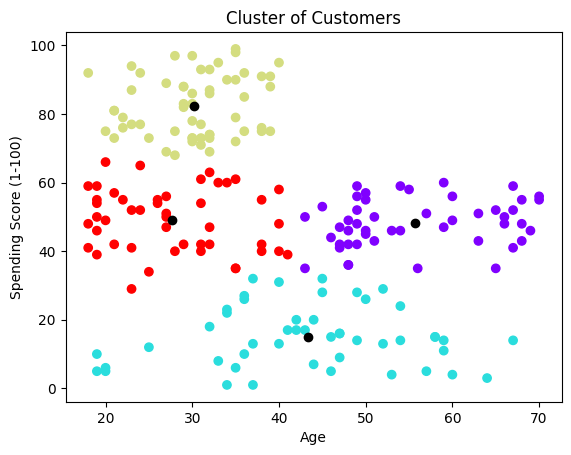

In [45]:
plt.scatter(x1[:,0],x1[:,1],c= kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title("Cluster of Customers")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

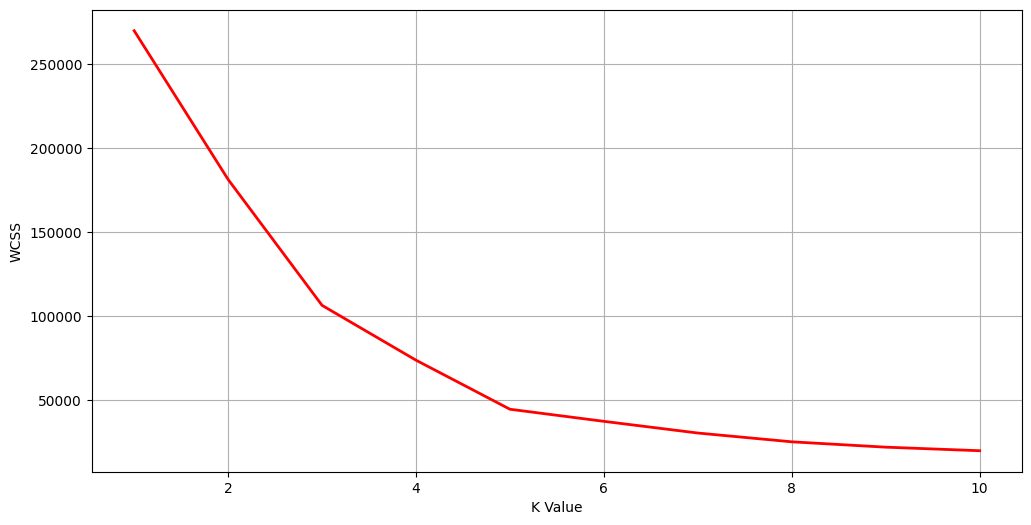

In [46]:
x2 =df1.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss=[]
for k in range (1,11):
  kmeans = KMeans(n_clusters=k,init ="k-means++")
  kmeans.fit(x2)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2, color= "red")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [49]:
# no of cluster = 5
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict(x2)

print(label)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 1 3 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


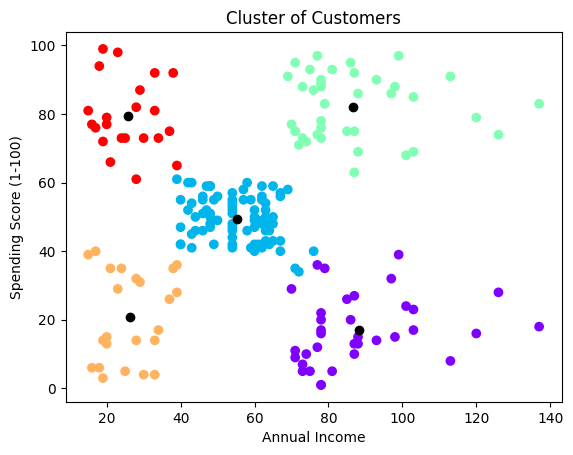

In [50]:
plt.scatter(x2[:,0],x2[:,1],c= kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title("Cluster of Customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score (1-100)")
plt.show()